# Introduction

Height plays an exceptionally significant role in basketball, especially in the professional NBA league. For years, this sport has been associated with players of impressive stature. A player's height not only impacts their ability to score and defend, but also results in spectacular dunks, blocks, and shots that captivate fans around the globe. Currently, players reaching heights of even over 213 cm (7 feet) are not uncommon. Tall players excel in scoring, shot-blocking, and controlling the game's tempo, making height a crucial factor in the pursuit of success on NBA courts.\
Below, we will present general analyses regarding changes in the heights of NBA players over the years. By examining these shifts, we gain a better understanding of how diverse factors have influenced strategy, tactics, and playing style in the league. This perspective allows us to see how player height has become a pivotal aspect, while basketball as a discipline has continuously evolved, opening new possibilities and challenges. Here's an overview of these dynamic transformations, which aid us in better appreciating the development of basketball and the role of height within this process.
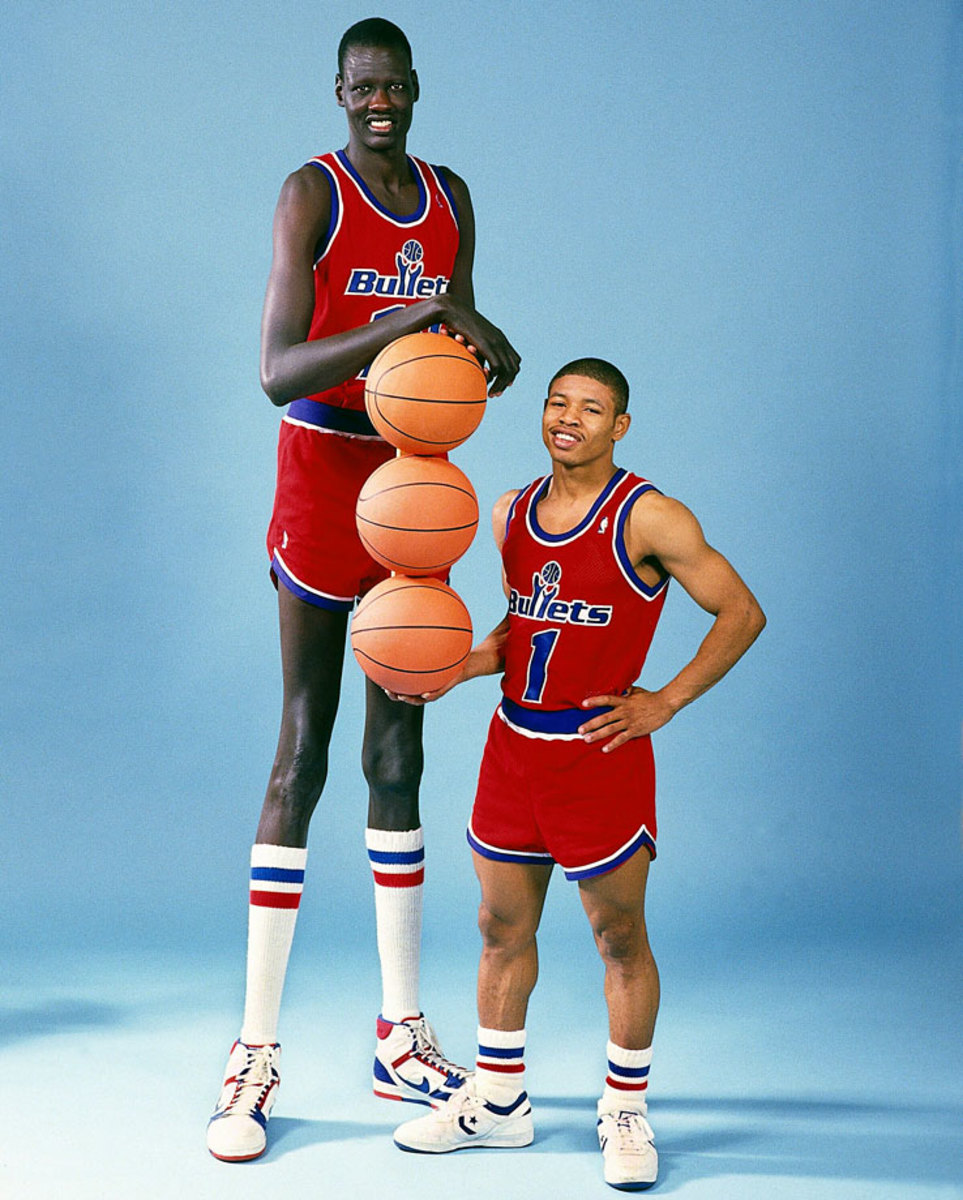
In the picture, the tallest basketball player in NBA history Manute Bol (231 cm) and the shortest basketball player in NBA history, Muggsy Bogues (160 cm)

<br>

 ## Table of contents
1. [Height](#Height)
2. [Weight](#Weight)
3. [BMI](#BMI)

In [992]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [993]:
df = pd.read_csv(r"C:\Users\GRZEGORZ\OneDrive\Pulpit\Portfolio_Projects\players.csv")
df.head(3)

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb


<br>

## Data Cleaning

In [994]:
# Converting data types
df['career_AST'] = pd.to_numeric(df['career_AST'], errors='coerce')
df['career_AST'] = df['career_AST'].replace(0.0, np.nan)
df['career_TRB'] = pd.to_numeric(df['career_TRB'], errors='coerce')
df['career_FG%'] = pd.to_numeric(df['career_FG%'], errors='coerce')
df['career_FG3%'] = pd.to_numeric(df['career_FG3%'], errors='coerce')
df['career_FT%'] = pd.to_numeric(df['career_FT%'], errors='coerce')
df['career_PER'] = pd.to_numeric(df['career_PER'], errors='coerce')
df['career_WS'] = pd.to_numeric(df['career_WS'], errors='coerce')
df['career_WS'] = df['career_WS'].replace(0.0, np.nan)
df['career_eFG%'] = pd.to_numeric(df['career_eFG%'], errors='coerce')
df['draft_year'] = pd.to_numeric(df['draft_year'], errors='coerce').astype('Int64')

In [995]:
# Standardization of data in the "position" column
df['position'] = df['position'].apply(lambda x: x.split('/')[0].split(' and ')[0])
df['position'] = df['position'].replace('Guard', 'Point Guard')
df['position'] = df['position'].replace('Forward', 'Small Forward')

In [996]:
# Creating a function that allows converting height from feet and inches to centimeters
def feet_inches_to_cm(height_str):
    feet, inches = map(int, height_str.split('-'))
    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm

df['height_cm'] = df['height'].apply(feet_inches_to_cm)
df['height_cm'] = df['height_cm'].round(0)
df['height_cm'] = df['height_cm'].astype(int)

In [997]:
# Converting weight from lb to kg
df['weight_numeric'] = df['weight'].str.replace('lb', '').str.strip().replace('invalid', float('nan'))
df['weight_numeric'] = pd.to_numeric(df['weight_numeric'], errors='coerce').fillna(0).astype(int)
df['weight_kg'] = df['weight_numeric'] * 0.45359237
df['weight_kg'] = df['weight_kg'].round(0)
df['weight_kg'] = df['weight_kg'].astype(int)

In [998]:
# Create column 'decade'
df['draft_year'] = pd.to_numeric(df['draft_year'], errors='coerce')
df['decade'] = (df['draft_year'] // 10) * 10

In [999]:
df.loc[df['name'] == 'Elgin Baylor', 'draft_year'] = '1958'
df.loc[df['name'] == 'Elgin Baylor', 'draft_round'] = '1st'
df.loc[df['name'] == 'Elgin Baylor', 'draft_pick'] = '1st overall'

df.loc[df['name'] == 'Sam Jones', 'draft_year'] = '1957'
df.loc[df['name'] == 'Sam Jones', 'draft_round'] = '1st'
df.loc[df['name'] == 'Sam Jones', 'draft_pick'] = '8th overall'
df.loc[df['name'] == 'Sam Jones', 'draft_team'] = 'Boston Celtics'

df.loc[df['name'] == 'Kenny Sears', 'draft_year'] = '1955'
df.loc[df['name'] == 'Kenny Sears', 'draft_round'] = '1st'
df.loc[df['name'] == 'Kenny Sears', 'draft_pick'] = '4th overall'
df.loc[df['name'] == 'Kenny Sears', 'draft_team'] = 'New York Knicks'

df.loc[df['name'] == 'K.C. Jones', 'draft_year'] = '1956'
df.loc[df['name'] == 'K.C. Jones', 'draft_round'] = '1st'
df.loc[df['name'] == 'K.C. Jones', 'draft_pick'] = '14th overall'
df.loc[df['name'] == 'K.C. Jones', 'draft_team'] = 'Boston Celtics'

df.loc[df['name'] == 'Nate Williams', 'draft_year'] = '1971'
df.loc[df['name'] == 'Nate Williams', 'draft_round'] = '1st'
df.loc[df['name'] == 'Nate Williams', 'draft_pick'] = '1st overall'

df.loc[df['name'] == 'Tristan Thompson', 'shoots'] = 'Right'

df = df[df['_id'] != 'brennto01']
df = df[df['_id'] != 'orrjo01']
df = df[df['_id'] != 'colemja01']

<br>

# Height

In [1000]:
# Creating an auxiliary table storing the height and the quantity of basketball players with a given height
height_counts_df = df['height'].value_counts().reset_index()
height_counts_df.columns = ['height', 'count']

# Sort values
height_counts_df['height'] = pd.Categorical(height_counts_df['height'], categories=[
    '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', '5-11',
    '6-0', '6-1', '6-2', '6-3', '6-4', '6-5', '6-6', '6-7', '6-8', '6-9', '6-10',
    '6-11', '7-0', '7-1', '7-2', '7-3', '7-4', '7-5', '7-6', '7-7'
], ordered=True)

height_counts_sorted = height_counts_df.sort_values('height')

<br>

### Height distribution

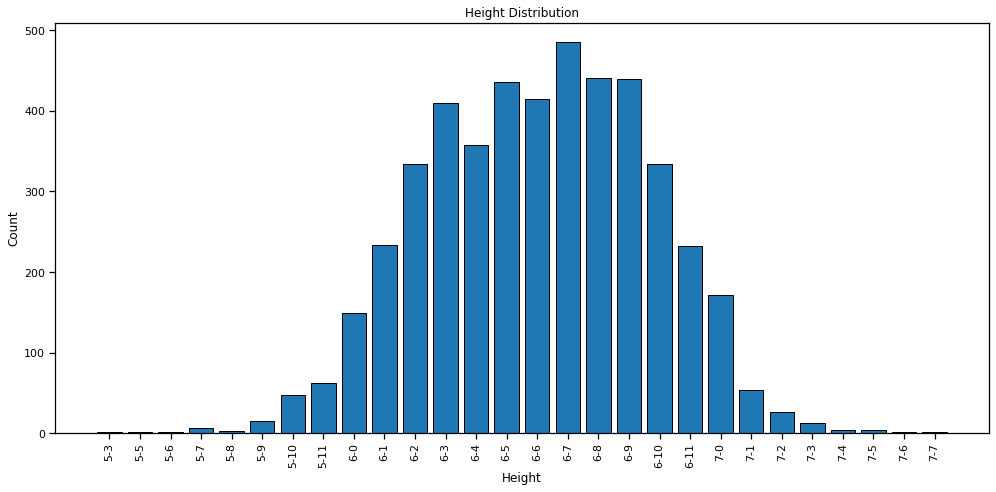

In [1001]:
plt.figure(figsize=(14, 7))
plt.bar(height_counts_sorted['height'], height_counts_sorted['count'], edgecolor='black')
plt.xticks(rotation=90, ha='center')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Height Distribution')
plt.tight_layout()

<br>

### Height distribution by position

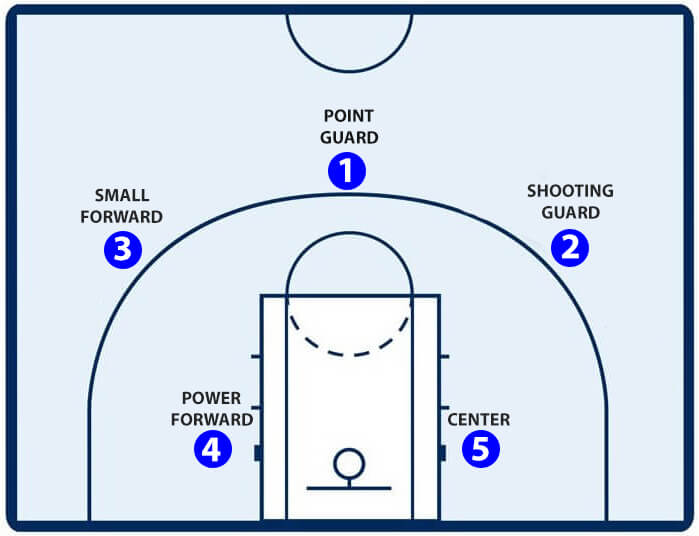

In [1002]:
grouped = df.groupby(['position', 'height']).size().reset_index(name='count')
grouped

,position,height,count
0,Center,6-10,170
1,Center,6-11,163
2,Center,6-4,3
3,Center,6-5,5
4,Center,6-6,18
...,...,...,...
71,Small Forward,6-6,201
72,Small Forward,6-7,280
73,Small Forward,6-8,167
74,Small Forward,6-9,86


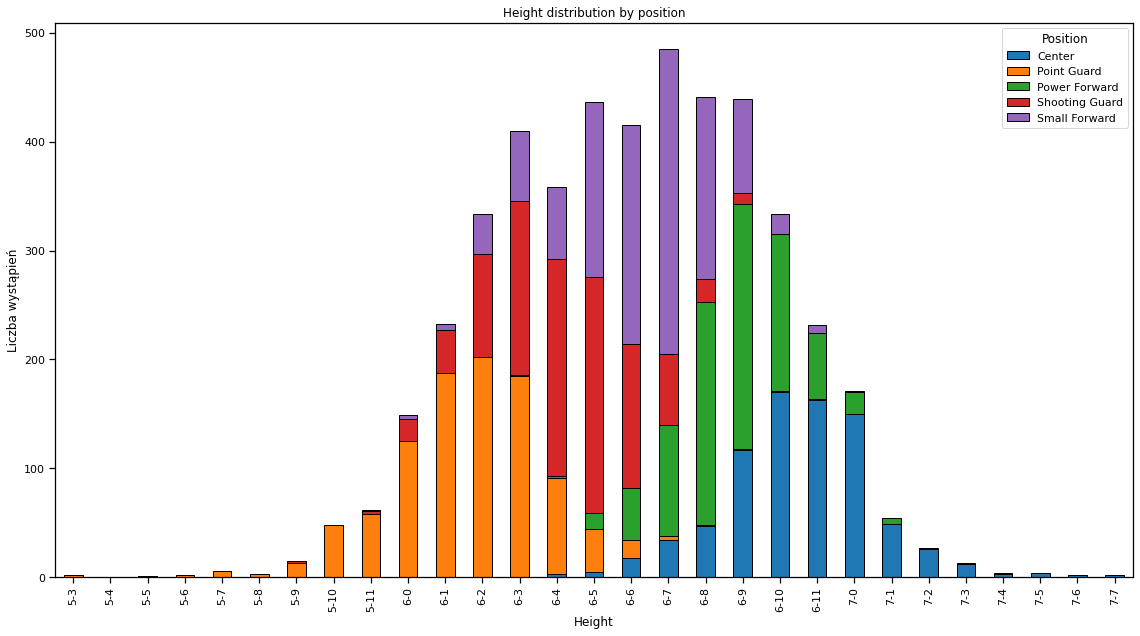

In [1003]:
custom_order = [
    '5-3','5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', '5-11',
    '6-0', '6-1', '6-2', '6-3', '6-4', '6-5', '6-6', '6-7', '6-8', '6-9', '6-10',
    '6-11', '7-0', '7-1', '7-2', '7-3', '7-4', '7-5', '7-6', '7-7']

count_per_height_position = df.groupby(['height', 'position']).size().unstack(fill_value=0)
count_per_height_position = count_per_height_position.reindex(custom_order, fill_value=0)

fig, ax = plt.subplots(figsize=(16, 9))
count_per_height_position.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', linewidth=1)
ax.set_xlabel('Height')
ax.set_ylabel('Liczba wystąpień')
ax.set_title('Height distribution by position')
ax.set_xticklabels(count_per_height_position.index, rotation=90)
ax.legend(title='Position')

plt.tight_layout()
plt.savefig('wykres.png', dpi=350)
plt.show()

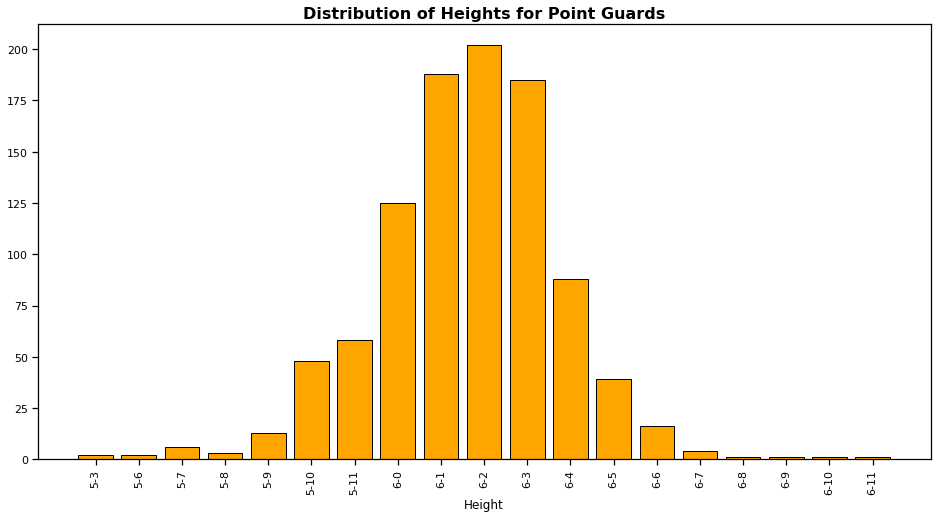

In [1004]:
df_PG = df[df['position'] == 'Point Guard']
grouped1 = df_PG.groupby('height').size().reset_index(name='count')
grouped1['height'] = pd.Categorical(grouped1['height'], custom_order)
grouped1 = grouped1.sort_values('height')

plt.figure(figsize=(16, 8))
plt.bar(grouped1['height'], grouped1['count'], color='orange',edgecolor='black')
plt.xlabel('Height')
plt.title('Distribution of Heights for Point Guards', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

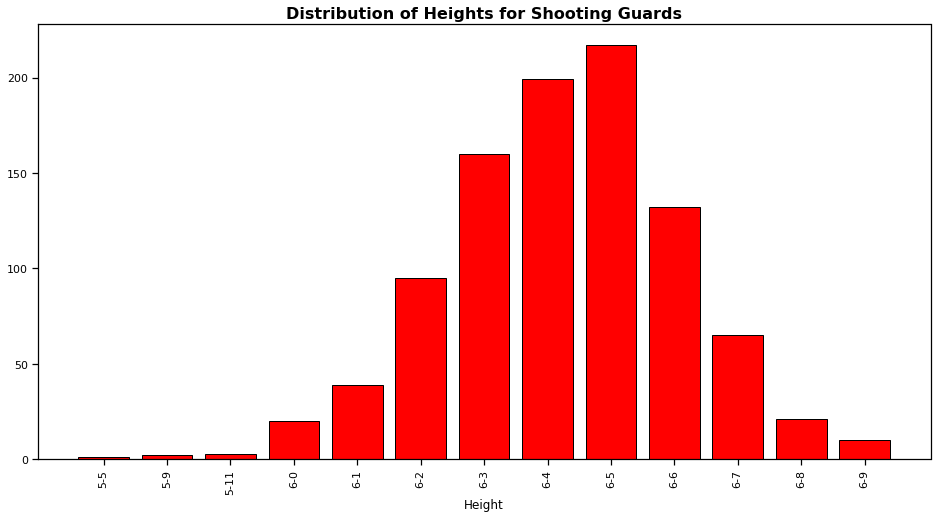

In [1005]:
df_SG = df[df['position'] == 'Shooting Guard']
grouped2 = df_SG.groupby('height').size().reset_index(name='count')
grouped2['height'] = pd.Categorical(grouped2['height'], custom_order)
grouped2 = grouped2.sort_values('height')

plt.figure(figsize=(16, 8))
plt.bar(grouped2['height'], grouped2['count'], color='red',edgecolor='black')
plt.xlabel('Height')
plt.title('Distribution of Heights for Shooting Guards', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

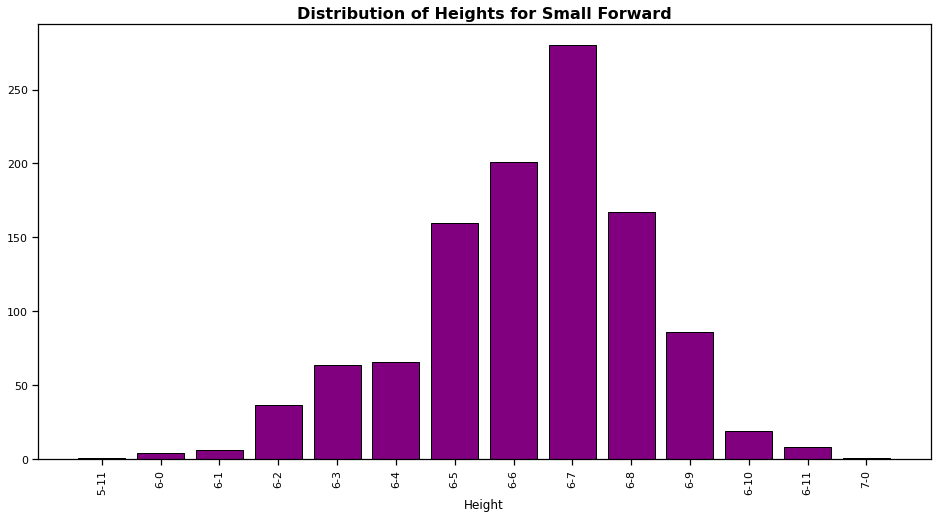

In [1006]:
df_SF = df[df['position'] == 'Small Forward']
grouped3 = df_SF.groupby('height').size().reset_index(name='count')
grouped3['height'] = pd.Categorical(grouped3['height'], custom_order)
grouped3 = grouped3.sort_values('height')

plt.figure(figsize=(16, 8))
plt.bar(grouped3['height'], grouped3['count'], color='purple',edgecolor='black')
plt.xlabel('Height')
plt.title('Distribution of Heights for Small Forward', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

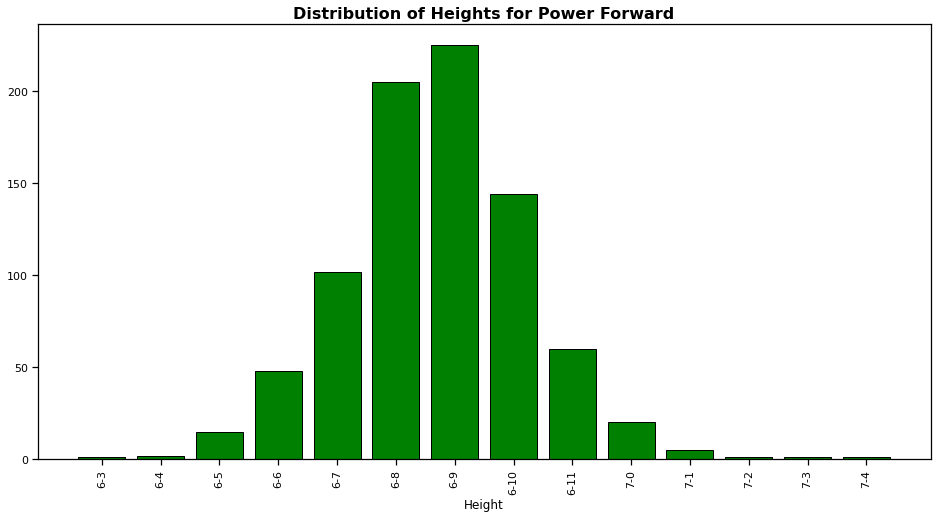

In [1007]:
df_PF = df[df['position'] == 'Power Forward']
grouped4 = df_PF.groupby('height').size().reset_index(name='count')
grouped4['height'] = pd.Categorical(grouped4['height'], custom_order)
grouped4 = grouped4.sort_values('height')

plt.figure(figsize=(16, 8))
plt.bar(grouped4['height'], grouped4['count'], color='green',edgecolor='black')
plt.xlabel('Height')
plt.title('Distribution of Heights for Power Forward', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

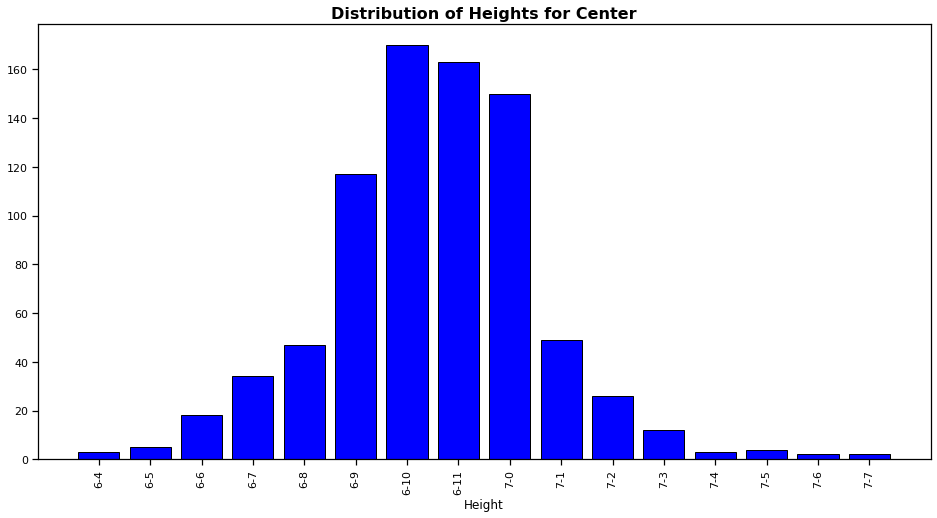

In [1008]:
df_C = df[df['position'] == 'Center']
grouped5 = df_C.groupby('height').size().reset_index(name='count')
grouped5['height'] = pd.Categorical(grouped5['height'], custom_order)
grouped5 = grouped5.sort_values('height')

plt.figure(figsize=(16, 8))
plt.bar(grouped5['height'], grouped5['count'], color='blue',edgecolor='black')
plt.xlabel('Height')
plt.title('Distribution of Heights for Center', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [1009]:
df.groupby('position')['height_cm'].agg(['mean', 'std']).round(2)

,mean,std
position,,
Center,209.57,5.17
Point Guard,186.84,5.38
Power Forward,204.94,3.94
Shooting Guard,193.62,4.90
Small Forward,198.89,4.97


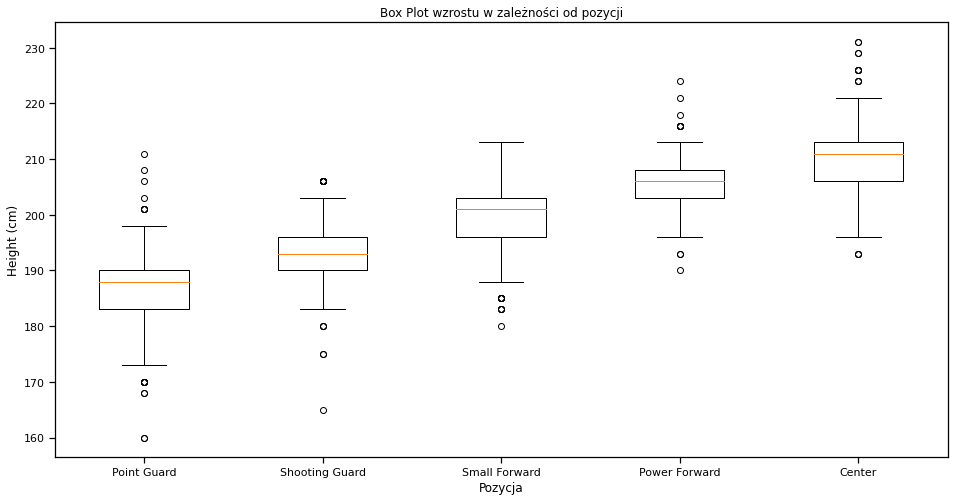

In [1010]:
plt.figure(figsize=(16, 8))
plt.boxplot(
    [df[df['position'] == 'Point Guard']['height_cm'],
     df[df['position'] == 'Shooting Guard']['height_cm'],
     df[df['position'] == 'Small Forward']['height_cm'],
     df[df['position'] == 'Power Forward']['height_cm'],
     df[df['position'] == 'Center']['height_cm']],
    labels=['Point Guard', 'Shooting Guard', 'Small Forward', 'Power Forward', 'Center']
)
plt.xlabel('Pozycja')
plt.ylabel('Height (cm)')
plt.title('Box Plot wzrostu w zależności od pozycji')
plt.show()

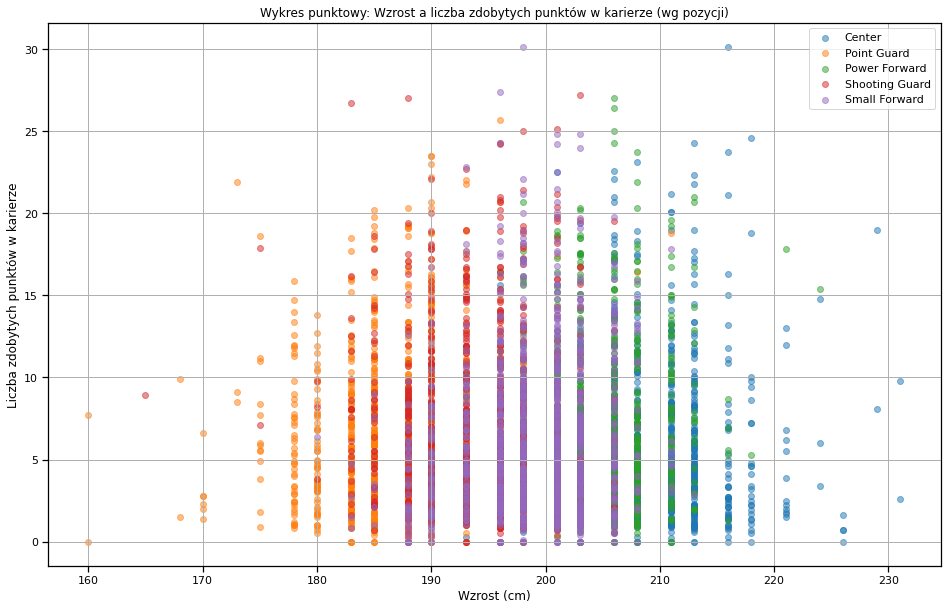

In [1011]:
position_groups = df.groupby('position')
plt.figure(figsize=(16, 10))  # Rozmiar wykresu
for position, group_data in position_groups:
    plt.scatter(group_data['height_cm'], group_data['career_PTS'], alpha=0.5, label=position)

# Dodawanie tytułów i etykiet osi
plt.title('Wykres punktowy: Wzrost a liczba zdobytych punktów w karierze (wg pozycji)')
plt.xlabel('Wzrost (cm)')
plt.ylabel('Liczba zdobytych punktów w karierze')

plt.grid(True)  # Włączenie siatki na wykresie
plt.legend()  # Dodanie legendy


In [1012]:
df['height_cm'].corr(df['career_PTS'])

-0.0029241983198187407

<br>

### Height changes over the years

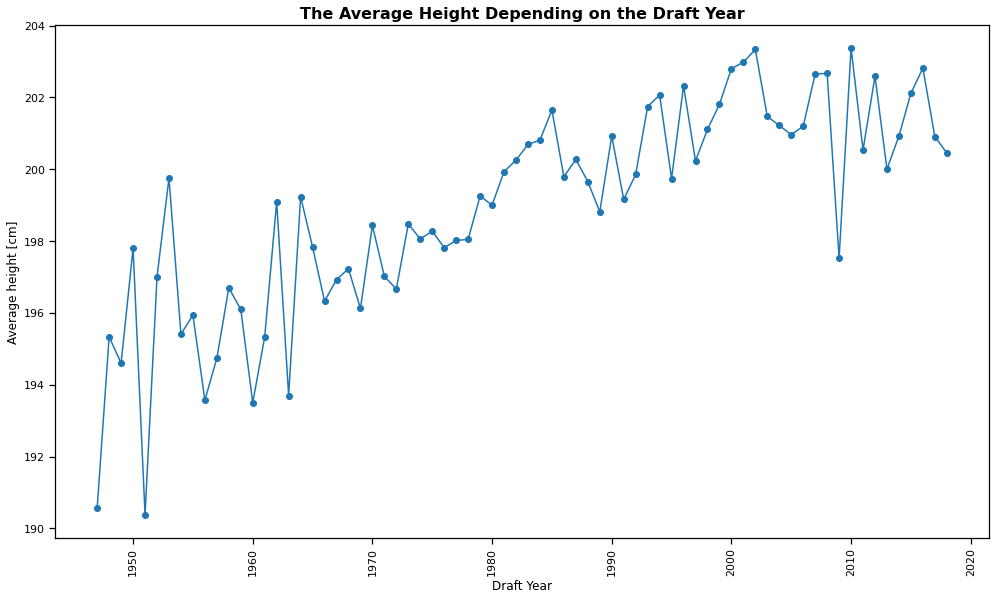

In [1013]:
average_height_by_year = df.groupby('draft_year')['height_cm'].mean().reset_index()

plt.figure(figsize=(14, 8.5))
plt.plot(average_height_by_year['draft_year'], average_height_by_year['height_cm'], marker='o')
plt.title('The Average Height Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average height [cm]')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

<br>

### Height changes over the years by position

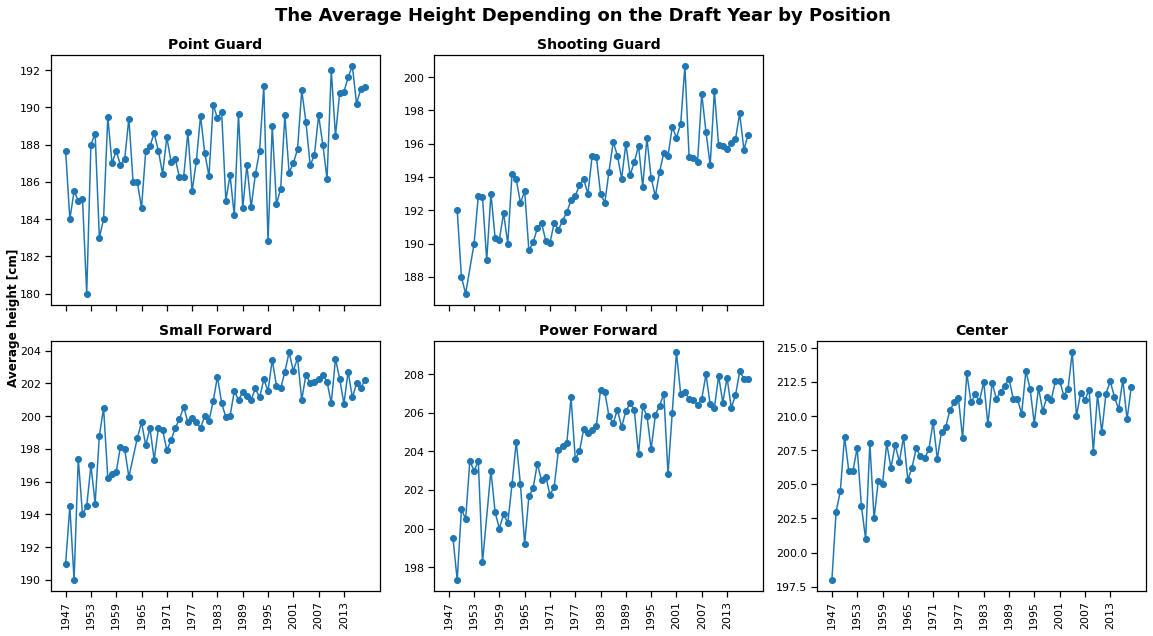

In [1014]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9), sharex=True)

def plot_average_height(ax, df, position_name):
    average_height_by_year = df.groupby('draft_year')['height_cm'].mean().reset_index()
    ax.plot(average_height_by_year['draft_year'], average_height_by_year['height_cm'], marker='o')
    ax.set_title(position_name, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)
    ax.grid(False)

# Wywołanie funkcji dla każdej pozycji
plot_average_height(axs[0, 0], df_PG, 'Point Guard')
plot_average_height(axs[0, 1], df_SG, 'Shooting Guard')
plot_average_height(axs[1, 0], df_SF, 'Small Forward')
plot_average_height(axs[1, 1], df_PF, 'Power Forward')
plot_average_height(axs[1, 2], df_C, 'Center')
axs[0, 2].axis('off')

x_ticks = average_height_by_year5['draft_year'][::6]
x_ticks = [int(x) for x in x_ticks if not pd.isna(x)]
plt.xticks(x_ticks)
plt.suptitle('The Average Height Depending on the Draft Year by Position', fontsize=18, fontweight='bold')
fig.text(0, 0.5, 'Average height [cm]', va='center', rotation='vertical', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

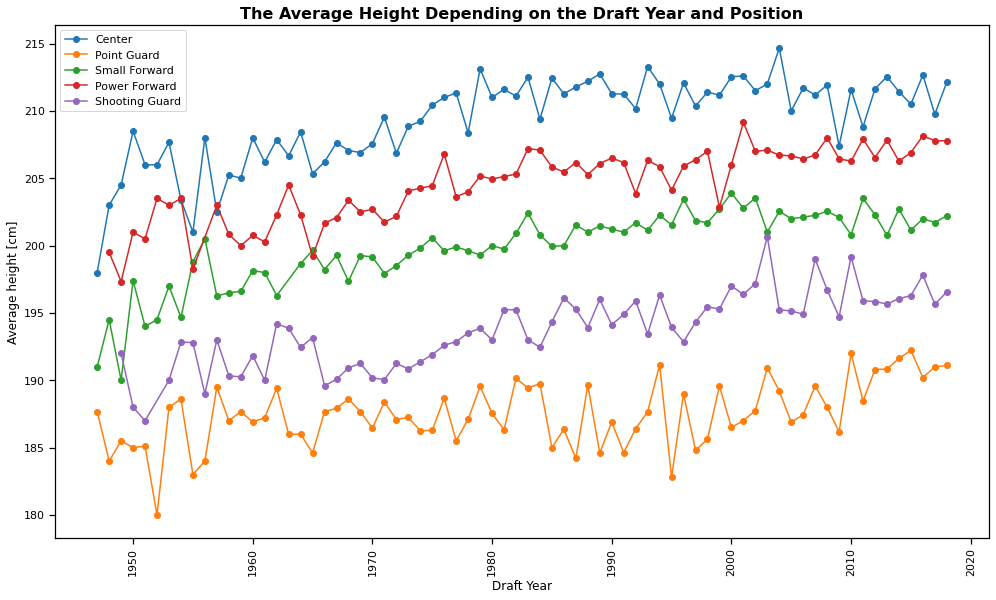

In [1015]:
average_height_by_year_position = df.groupby(['draft_year', 'position'])['height_cm'].mean().reset_index()

plt.figure(figsize=(14, 8.5))

positions = average_height_by_year_position['position'].unique()
for pos in positions:
    data_subset = average_height_by_year_position[average_height_by_year_position['position'] == pos]
    plt.plot(data_subset['draft_year'], data_subset['height_cm'], marker='o', label=pos)

plt.title('The Average Height Depending on the Draft Year and Position', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average height [cm]')
plt.xticks(rotation=90)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

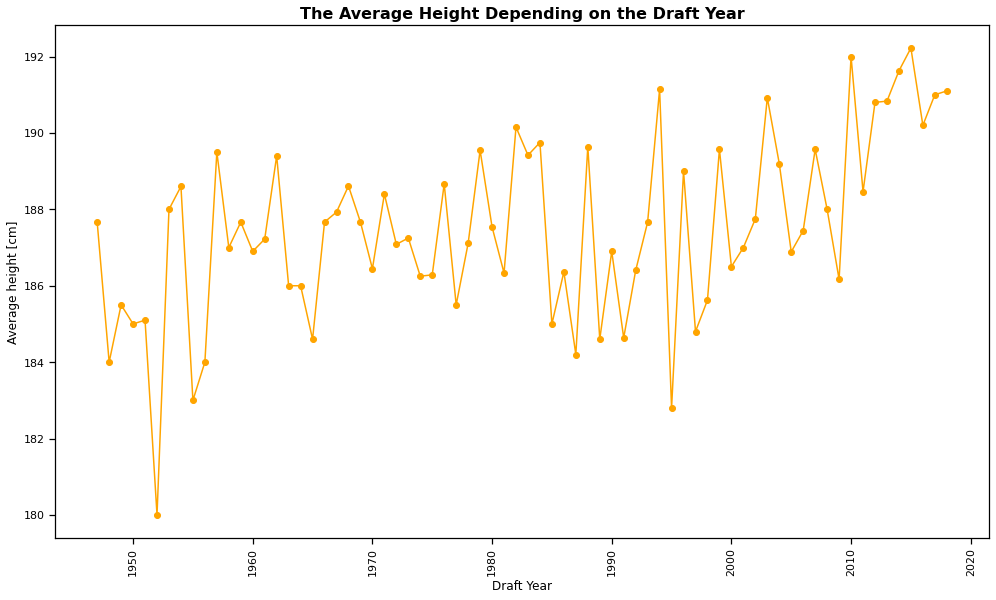

In [1016]:
average_height_by_year1 = df_PG.groupby('draft_year')['height_cm'].mean().reset_index()

plt.figure(figsize=(14, 8.5))
plt.plot(average_height_by_year1['draft_year'], average_height_by_year1['height_cm'], marker='o', color='orange')
plt.title('The Average Height Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average height [cm]')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

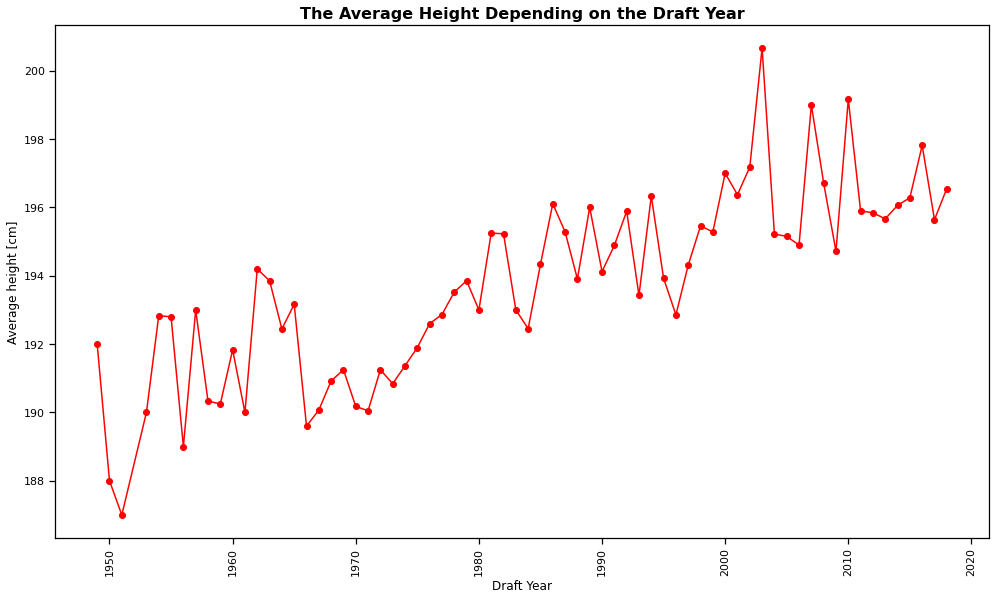

In [1017]:
average_height_by_year2 = df_SG.groupby('draft_year')['height_cm'].mean().reset_index()

plt.figure(figsize=(14, 8.5))
plt.plot(average_height_by_year2['draft_year'], average_height_by_year2['height_cm'], marker='o', color='red')
plt.title('The Average Height Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average height [cm]')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

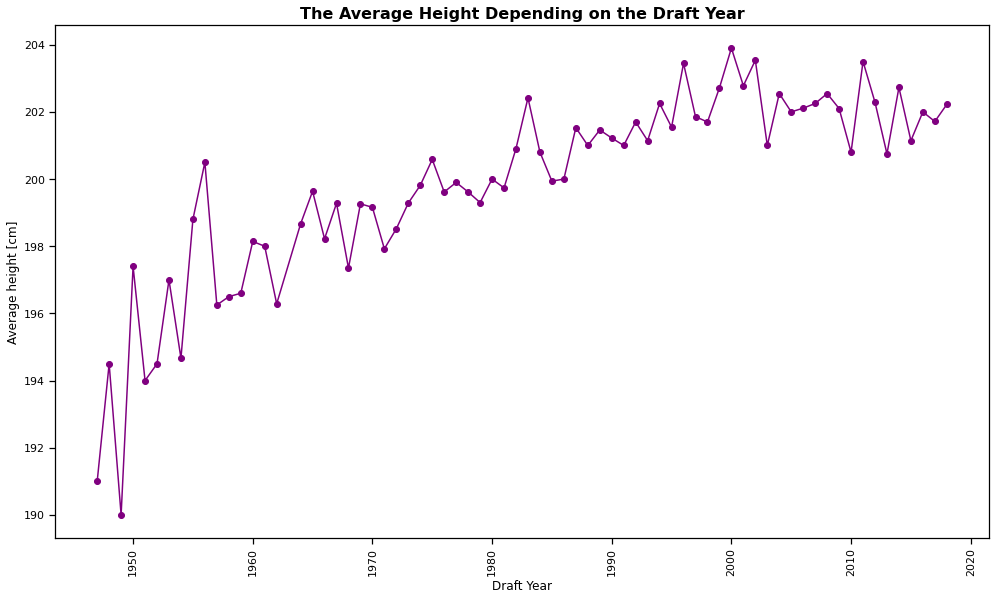

In [1018]:
average_height_by_year3 = df_SF.groupby('draft_year')['height_cm'].mean().reset_index()

plt.figure(figsize=(14, 8.5))
plt.plot(average_height_by_year3['draft_year'], average_height_by_year3['height_cm'], marker='o', color='purple')
plt.title('The Average Height Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average height [cm]')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

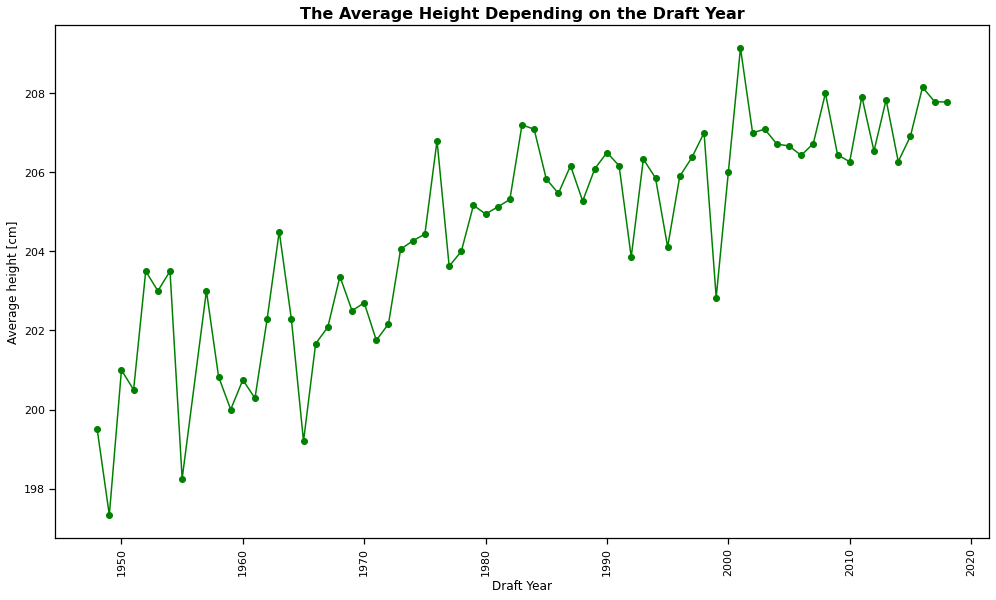

In [1019]:
average_height_by_year4 = df_PF.groupby('draft_year')['height_cm'].mean().reset_index()

plt.figure(figsize=(14, 8.5))
plt.plot(average_height_by_year4['draft_year'], average_height_by_year4['height_cm'], marker='o', color='green')
plt.title('The Average Height Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average height [cm]')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

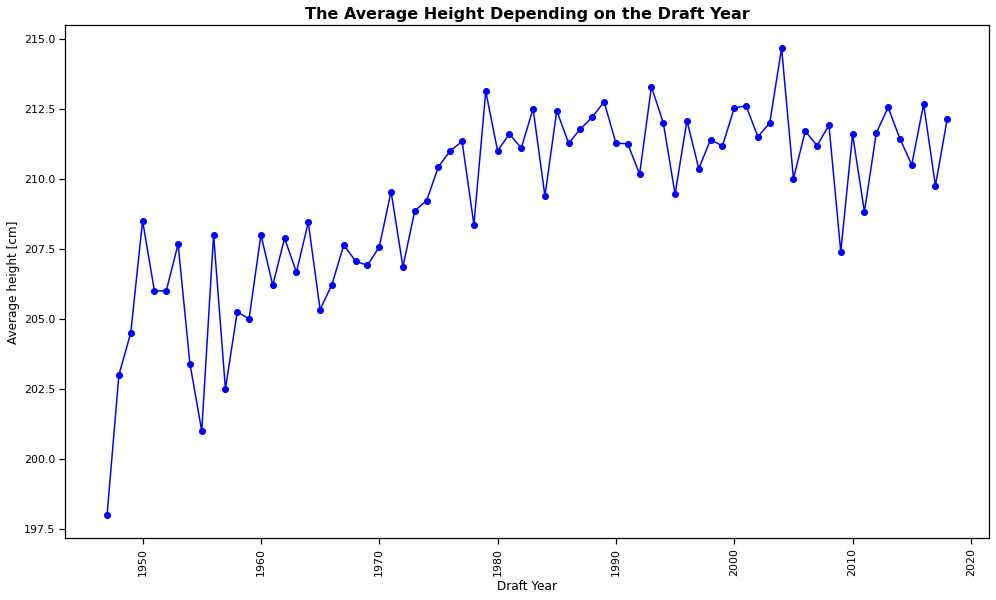

In [1020]:
average_height_by_year5 = df_C.groupby('draft_year')['height_cm'].mean().reset_index()

plt.figure(figsize=(14, 8.5))
plt.plot(average_height_by_year5['draft_year'], average_height_by_year5['height_cm'], marker='o', color='blue')
plt.title('The Average Height Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average height [cm]')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

In [1021]:
decade_avg_height = df.groupby('decade')['height_cm'].mean().reset_index()
decade_avg_height = decade_avg_height.round(2)

# Calculating relative growth
decade_avg_height['relative_growth'] = (decade_avg_height['height_cm'] - decade_avg_height['height_cm'].shift(1)) / decade_avg_height['height_cm'].shift(1)

decade_avg_height

,decade,height_cm,relative_growth
0,1940,193.77,NaN
1,1950,195.25,0.007638
2,1960,196.72,0.007529
3,1970,197.99,0.006456
4,1980,200.13,0.010809
5,1990,200.89,0.003798
6,2000,201.67,0.003883
7,2010,201.52,-0.000744


In [1022]:
# PG
decade_avg_height1 = df_PG.groupby('decade')['height_cm'].mean().reset_index()
decade_avg_height1 = decade_avg_height1.round(2)

# Calculating relative growth
decade_avg_height1['relative_growth'] = (decade_avg_height1['height_cm'] - decade_avg_height1['height_cm'].shift(1)) / decade_avg_height1['height_cm'].shift(1)
decade_avg_height1

,decade,height_cm,relative_growth
0,1940,186.00,NaN
1,1950,186.68,0.003656
2,1960,187.51,0.004446
3,1970,187.33,-0.000960
4,1980,187.54,0.001121
5,1990,186.91,-0.003359
6,2000,188.03,0.005992
7,2010,190.78,0.014625


In [1023]:
# SG
decade_avg_height2 = df_SG.groupby('decade')['height_cm'].mean().reset_index()
decade_avg_height2 = decade_avg_height2.round(2)

# Calculating relative growth
decade_avg_height2['relative_growth'] = (decade_avg_height2['height_cm'] - decade_avg_height2['height_cm'].shift(1)) / decade_avg_height2['height_cm'].shift(1)
decade_avg_height2

,decade,height_cm,relative_growth
0,1940,192.00,NaN
1,1950,190.69,-0.006823
2,1960,191.42,0.003828
3,1970,191.77,0.001828
4,1980,194.58,0.014653
5,1990,194.68,0.000514
6,2000,196.47,0.009195
7,2010,196.34,-0.000662


In [1024]:
# SF
decade_avg_height3 = df_SF.groupby('decade')['height_cm'].mean().reset_index()
decade_avg_height3 = decade_avg_height3.round(2)

# Calculating relative growth
decade_avg_height3['relative_growth'] = (decade_avg_height3['height_cm'] - decade_avg_height3['height_cm'].shift(1)) / decade_avg_height3['height_cm'].shift(1)
decade_avg_height3

,decade,height_cm,relative_growth
0,1940,192.00,NaN
1,1950,196.09,0.021302
2,1960,198.44,0.011984
3,1970,199.33,0.004485
4,1980,200.73,0.007024
5,1990,201.95,0.006078
6,2000,202.55,0.002971
7,2010,202.01,-0.002666


In [1025]:
# PF
decade_avg_height4 = df_PF.groupby('decade')['height_cm'].mean().reset_index()
decade_avg_height4 = decade_avg_height4.round(2)

# Calculating relative growth
decade_avg_height4['relative_growth'] = (decade_avg_height4['height_cm'] - decade_avg_height4['height_cm'].shift(1)) / decade_avg_height4['height_cm'].shift(1)
decade_avg_height4

,decade,height_cm,relative_growth
0,1940,198.57,NaN
1,1950,200.83,0.011381
2,1960,201.91,0.005378
3,1970,203.72,0.008964
4,1980,205.74,0.009916
5,1990,205.72,-0.000097
6,2000,207.12,0.006805
7,2010,207.22,0.000483


In [1026]:
# C
decade_avg_height5 = df_C.groupby('decade')['height_cm'].mean().reset_index()
decade_avg_height5 = decade_avg_height5.round(2)

# Calculating relative growth
decade_avg_height5['relative_growth'] = (decade_avg_height5['height_cm'] - decade_avg_height5['height_cm'].shift(1)) / decade_avg_height5['height_cm'].shift(1)
decade_avg_height5

,decade,height_cm,relative_growth
0,1940,202.50,NaN
1,1950,205.00,0.012346
2,1960,207.01,0.009805
3,1970,209.34,0.011255
4,1980,211.53,0.010461
5,1990,211.29,-0.001135
6,2000,211.70,0.001940
7,2010,211.26,-0.002078


<br>

### Height by throwing hand

In [1027]:
average_heights_hand = df.groupby('shoots')['height_cm'].agg(['mean', 'std', 'median']).reset_index()
average_heights_hand

,shoots,mean,std,median
0,Left,198.784452,9.784169,198.0
1,Right,198.149386,9.236597,198.0


<br>

# Weight

Text(0, 0.5, 'Frequency')

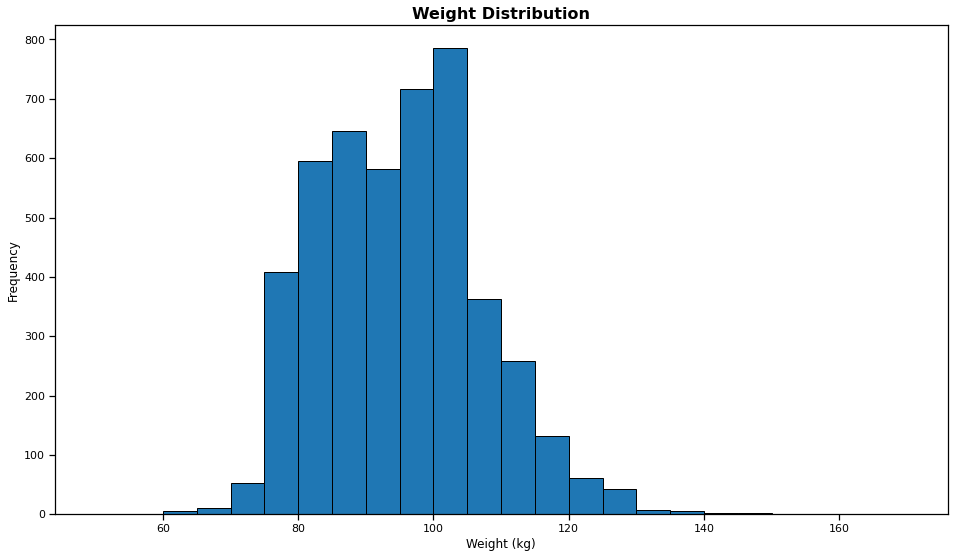

In [1028]:
non_zero_weights = df[df['weight_kg'] != 0]['weight_kg']

custom_bins = range(50, 171, 5)

plt.figure(figsize=(16, 9)) 
plt.hist(non_zero_weights, bins=custom_bins, edgecolor='black')
plt.title('Weight Distribution', weight='bold', size=16)
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

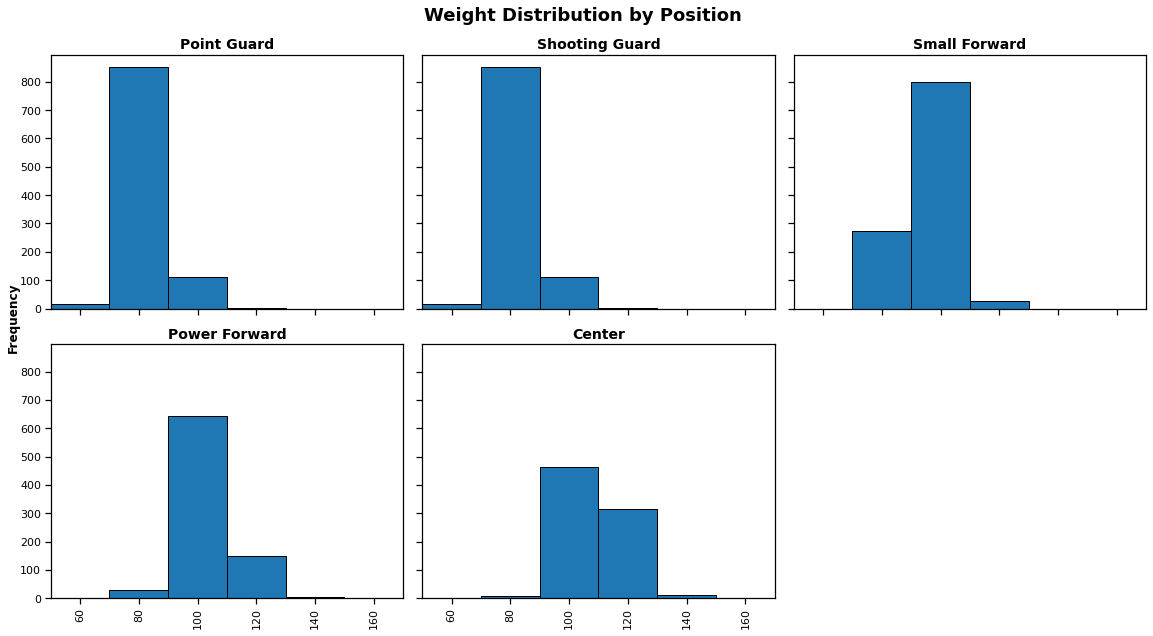

In [1029]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9), sharex=True, sharey=True)

position_dfs = [df_PG, df_PG, df_SF, df_PF, df_C]
position_titles = ['Point Guard', 'Shooting Guard', 'Small Forward', 'Power Forward', 'Center']

for i, (position_df, title) in enumerate(zip(position_dfs, position_titles)):
    ax = axs[i // 3, i % 3]
    ax.hist(position_df['weight_kg'], bins=range(50, 171, 20), edgecolor='black')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlim(50, 170)
    ax.tick_params(axis='x', rotation=90)
    ax.grid(False)

axs[1, 2].axis('off')
plt.subplots_adjust(top=0.85, hspace=0.4)
plt.suptitle('Weight Distribution by Position', fontsize=18, fontweight='bold')
fig.text(0, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

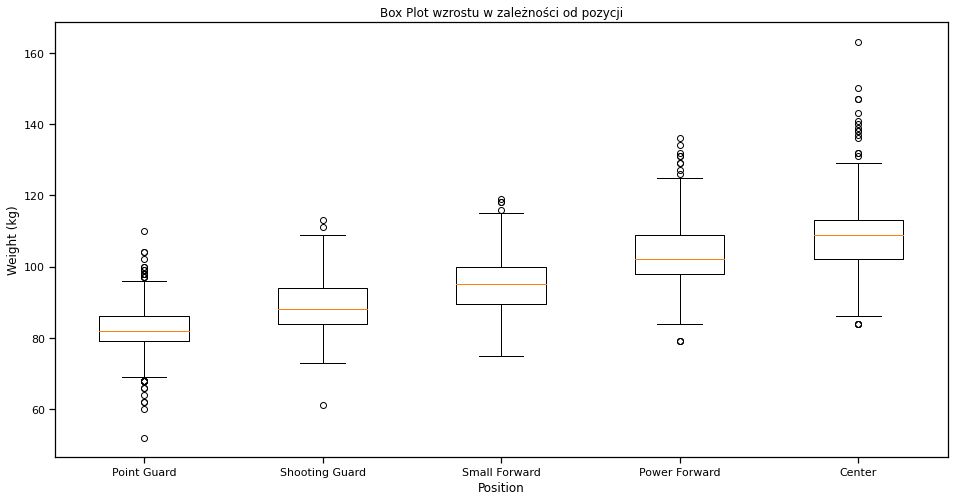

In [1030]:
df_ = df[df['weight_kg'] != 0]

plt.figure(figsize=(16, 8))
plt.boxplot(
    [df_[df_['position'] == 'Point Guard']['weight_kg'],
     df_[df_['position'] == 'Shooting Guard']['weight_kg'],
     df_[df_['position'] == 'Small Forward']['weight_kg'],
     df_[df_['position'] == 'Power Forward']['weight_kg'],
     df_[df_['position'] == 'Center']['weight_kg']],
    labels=['Point Guard', 'Shooting Guard', 'Small Forward', 'Power Forward', 'Center']
)
plt.xlabel('Position')
plt.ylabel('Weight (kg)')
plt.title('Box Plot wzrostu w zależności od pozycji')
plt.show()

<br>

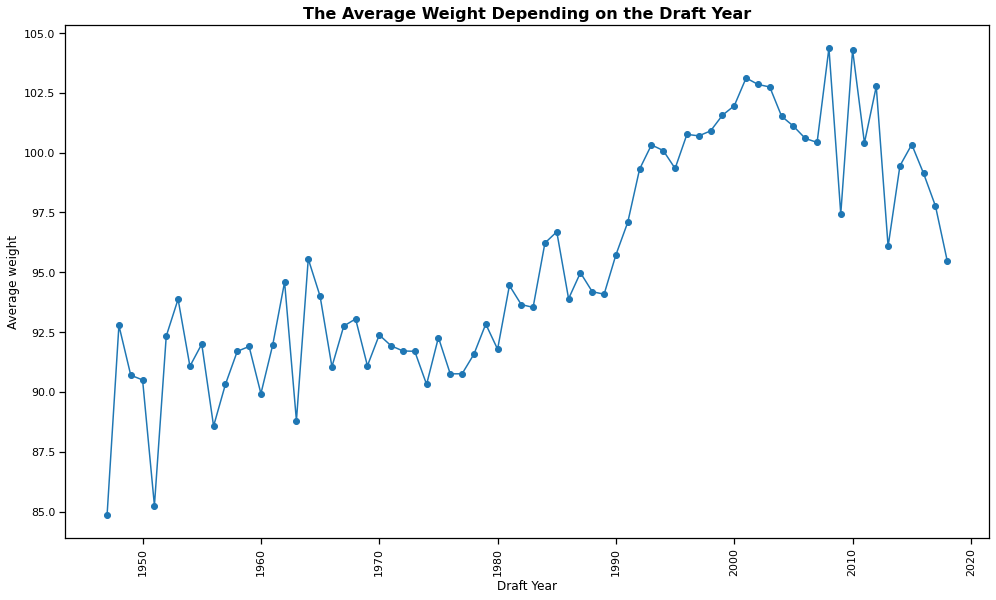

In [1046]:
average_weight_by_year = df_BMI.groupby('draft_year')['weight_kg'].mean().reset_index()

plt.figure(figsize=(14, 8.5))
plt.plot(average_weight_by_year['draft_year'], average_weight_by_year['weight_kg'], marker='o')
plt.title('The Average Weight Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average weight')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

In [1032]:
average_weight_s = df.groupby('draft_year')['weight_kg'].agg(['mean', 'std', 'median']).reset_index()
average_weight_s

,draft_year,mean,std,median
0,1947,84.857143,6.362090,84.0
1,1948,92.777778,9.337797,95.0
2,1949,90.700000,8.472832,89.5
3,1950,90.500000,8.797095,91.0
4,1951,85.250000,5.965480,84.0
...,...,...,...,...
67,2014,99.452830,11.219088,99.0
68,2015,100.340909,10.071704,101.0
69,2016,99.129630,10.527675,100.0
70,2017,97.773585,9.937577,98.0


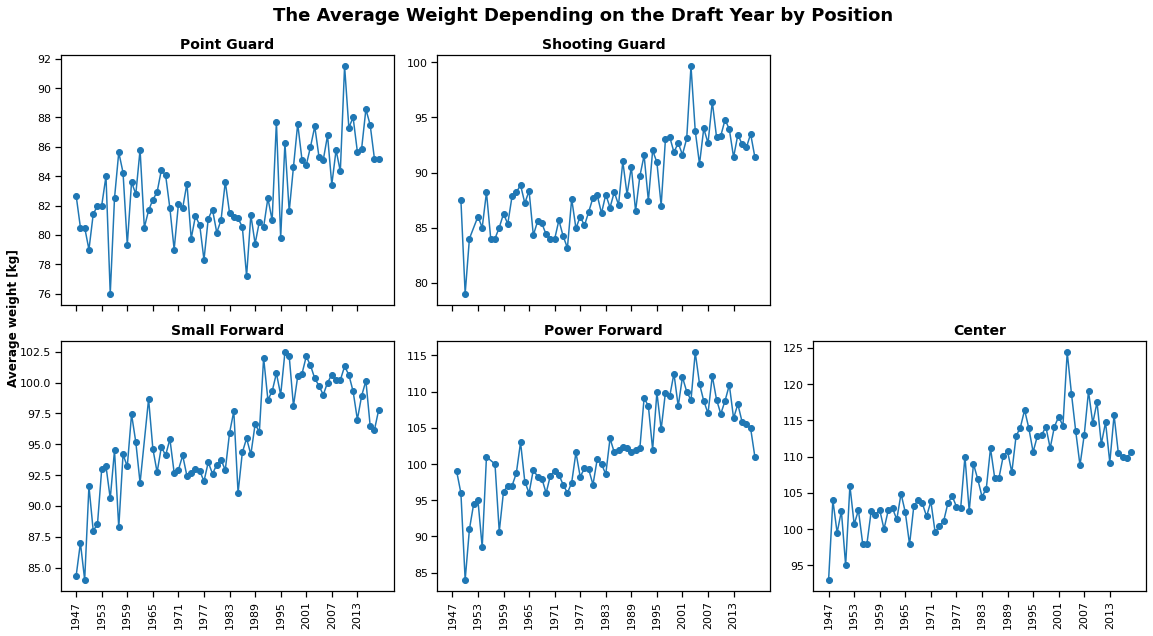

In [1033]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9), sharex=True)

def plot_average_weight(ax, df, position_name):
    average_weight_by_year = df.groupby('draft_year')['weight_kg'].mean().reset_index()
    ax.plot(average_weight_by_year['draft_year'], average_weight_by_year['weight_kg'], marker='o')
    ax.set_title(position_name, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)
    ax.grid(False)

plot_average_weight(axs[0, 0], df_PG, 'Point Guard')
plot_average_weight(axs[0, 1], df_SG, 'Shooting Guard')
plot_average_weight(axs[1, 0], df_SF, 'Small Forward')
plot_average_weight(axs[1, 1], df_PF, 'Power Forward')
plot_average_weight(axs[1, 2], df_C, 'Center')
axs[0, 2].axis('off')

x_ticks = average_weight_by_year5['draft_year'][::6]
x_ticks = [int(x) for x in x_ticks if not pd.isna(x)]
plt.xticks(x_ticks)
plt.suptitle('The Average Weight Depending on the Draft Year by Position', fontsize=18, fontweight='bold')
fig.text(0, 0.5, 'Average weight [kg]', va='center', rotation='vertical', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

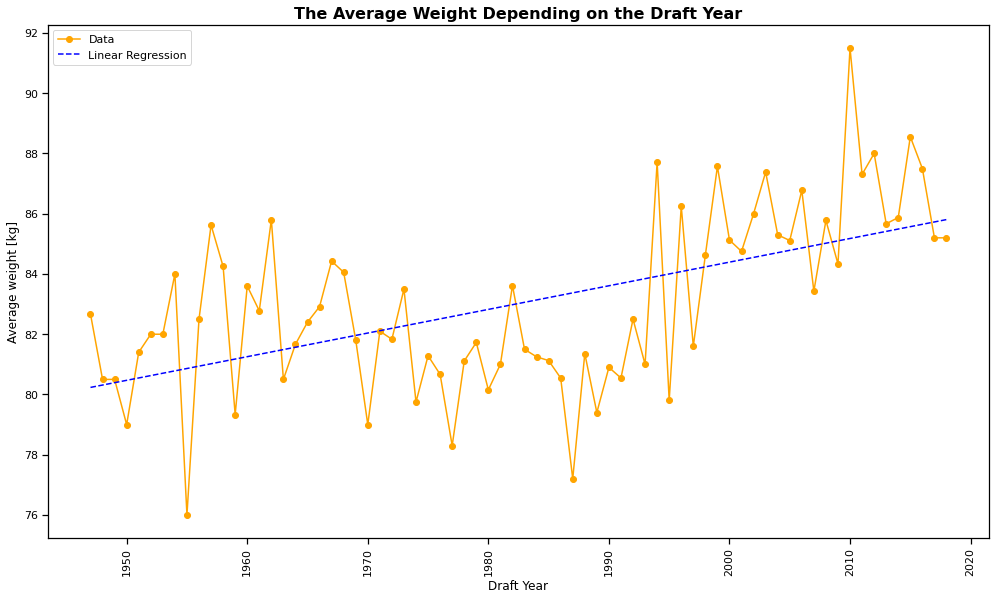

In [1093]:
average_weight_by_year1 = df_PG.groupby('draft_year')['weight_kg'].mean().reset_index()
average_weight_by_year1['draft_year'] = average_weight_by_year1['draft_year'].astype(int)
coefficients1 = np.polyfit(average_weight_by_year1['draft_year'], average_weight_by_year1['weight_kg'], 1)
polynomial1 = np.poly1d(coefficients1)
x_values1 = average_weight_by_year1['draft_year']
y_values1 = polynomial(x_values1)

plt.figure(figsize=(14, 8.5))
plt.plot(average_weight_by_year1['draft_year'], average_weight_by_year1['weight_kg'], marker='o', color='orange', label='Data')
plt.plot(x_values, y_values, color='blue', linestyle='dashed', label='Linear Regression')
plt.title('The Average Weight Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average weight [kg]')
plt.xticks(rotation=90)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

In [1043]:
f'Linear Regression: y = {polynomial1.coeffs[0]:.2f}x + {polynomial1.coeffs[1]:.2f}'

'Linear Regression: y = 0.08x + -72.56'

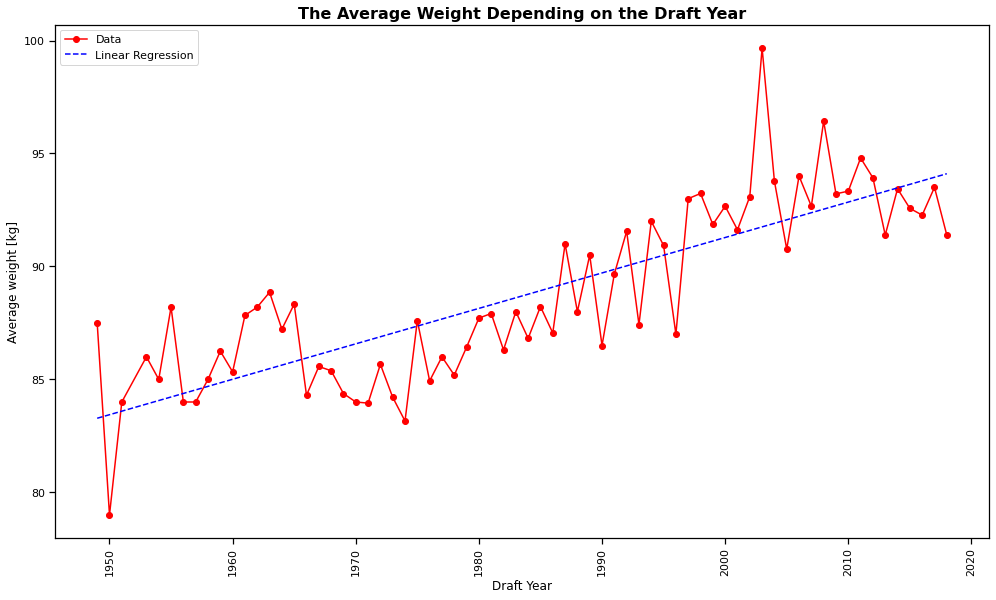

In [1092]:
average_weight_by_year2['draft_year'] = average_weight_by_year2['draft_year'].astype(int)

coefficients2 = np.polyfit(average_weight_by_year2['draft_year'], average_weight_by_year2['weight_kg'], 1)
polynomial2 = np.poly1d(coefficients2)
x_values2 = average_weight_by_year2['draft_year']
y_values2 = polynomial2(x_values2)

plt.figure(figsize=(14, 8.5))
plt.plot(average_weight_by_year2['draft_year'], average_weight_by_year2['weight_kg'], marker='o', color='red', label='Data')
plt.plot(x_values2, y_values2, color='blue', linestyle='dashed', label='Linear Regression')
plt.title('The Average Weight Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average weight [kg]')
plt.xticks(rotation=90)
plt.grid(False)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [1045]:
f'Linear Regression: y = {polynomial2.coeffs[0]:.2f}x + {polynomial2.coeffs[1]:.2f}'

'Linear Regression: y = 0.16x + -222.45'

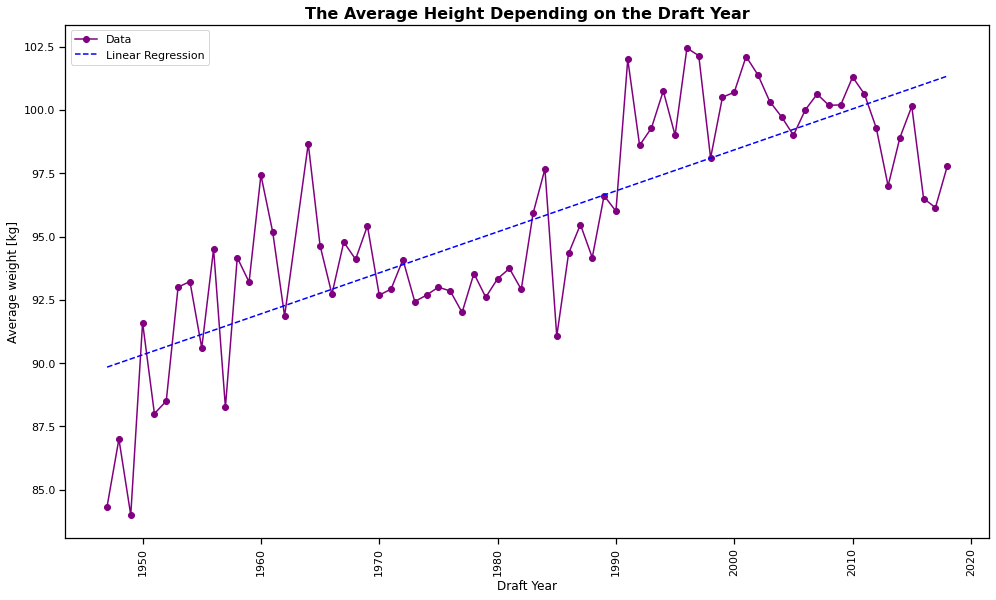

In [1087]:
average_weight_by_year3['draft_year'] = average_weight_by_year3['draft_year'].astype(int)

coefficients3 = np.polyfit(average_weight_by_year3['draft_year'], average_weight_by_year3['weight_kg'], 1)
polynomial3 = np.poly1d(coefficients3)
x_values3 = average_weight_by_year3['draft_year']
y_values3 = polynomial3(x_values3)

plt.figure(figsize=(14, 8.5))
plt.plot(average_weight_by_year3['draft_year'], average_weight_by_year3['weight_kg'], marker='o', color='purple', label='Data')
plt.plot(x_values3, y_values3, color='blue', linestyle='dashed', label='Linear Regression')
plt.title('The Average Height Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average weight [kg]')
plt.xticks(rotation=90)
plt.grid(False)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [1048]:
f'Linear Regression: y = {polynomial3.coeffs[0]:.2f}x + {polynomial3.coeffs[1]:.2f}'

'Linear Regression: y = 0.16x + -225.43'

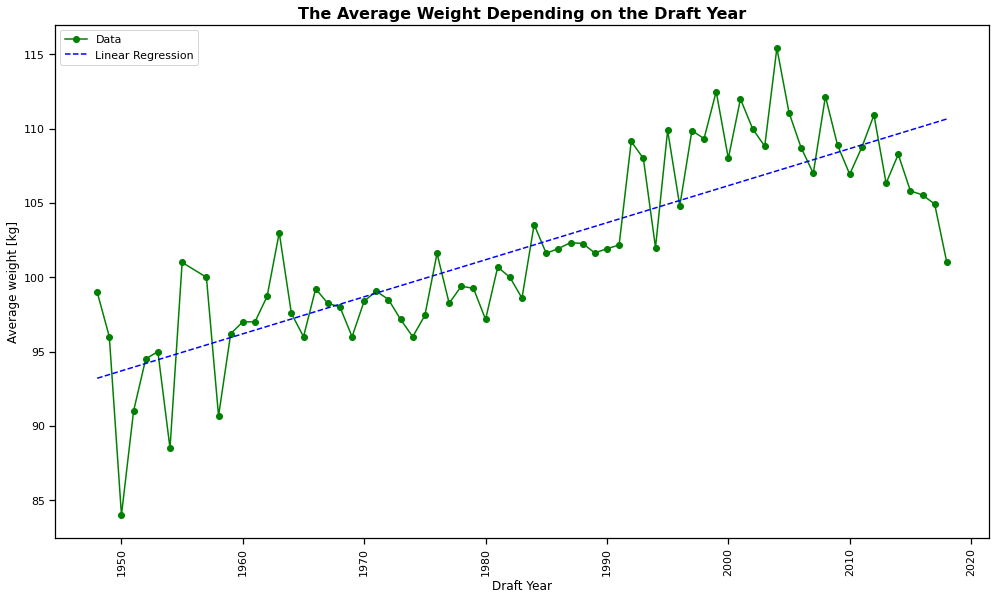

In [1089]:
average_weight_by_year4['draft_year'] = average_weight_by_year4['draft_year'].astype(int)
coefficients4 = np.polyfit(average_weight_by_year4['draft_year'], average_weight_by_year4['weight_kg'], 1)
polynomial4 = np.poly1d(coefficients4)
x_values4 = average_weight_by_year4['draft_year']
y_values4 = polynomial4(x_values4)

plt.figure(figsize=(14, 8.5))
plt.plot(average_weight_by_year4['draft_year'], average_weight_by_year4['weight_kg'], marker='o', color='green', label='Data')
plt.plot(x_values4, y_values4, color='blue', linestyle='dashed', label='Linear Regression')
plt.title('The Average Weight Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average weight [kg]')
plt.xticks(rotation=90)
plt.grid(False)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [1090]:
f'Linear Regression: y = {polynomial4.coeffs[0]:.2f}x + {polynomial4.coeffs[1]:.2f}'

'Linear Regression: y = 0.25x + -392.48'

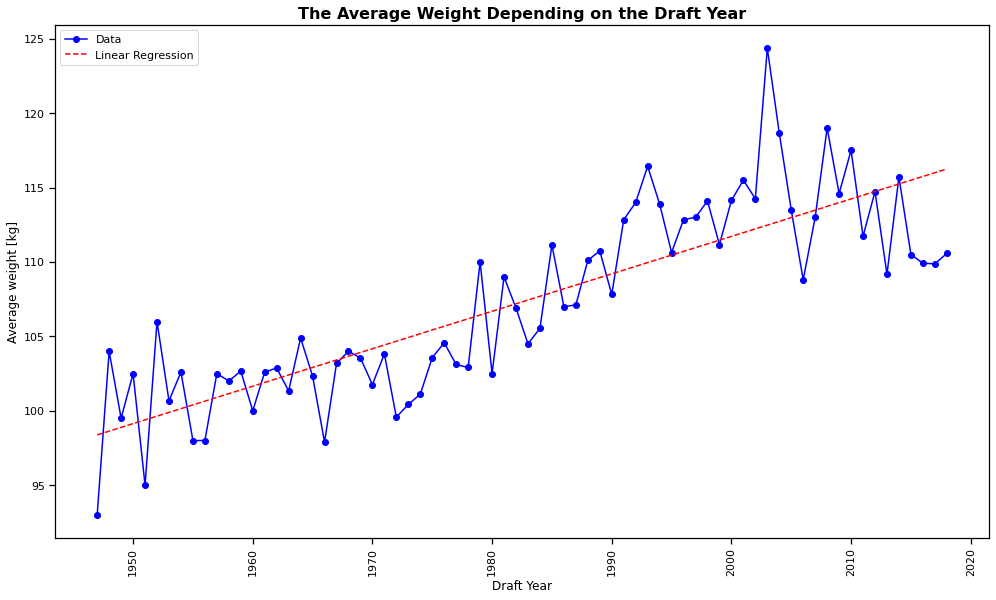

In [1094]:
average_weight_by_year5['draft_year'] = average_weight_by_year5['draft_year'].astype(int)

coefficients5 = np.polyfit(average_weight_by_year5['draft_year'], average_weight_by_year5['weight_kg'], 1)
polynomial5 = np.poly1d(coefficients5)
x_values5 = average_weight_by_year5['draft_year']
y_values5 = polynomial5(x_values5)

plt.figure(figsize=(14, 8.5))
plt.plot(average_weight_by_year5['draft_year'], average_weight_by_year5['weight_kg'], marker='o', color='blue', label='Data')
plt.plot(x_values5, y_values5, color='red', linestyle='dashed', label='Linear Regression')
plt.title('The Average Weight Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average weight [kg]')
plt.xticks(rotation=90)
plt.grid(False)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [1095]:
f'Linear Regression: y = {polynomial5.coeffs[0]:.2f}x + {polynomial5.coeffs[1]:.2f}'

'Linear Regression: y = 0.25x + -391.59'

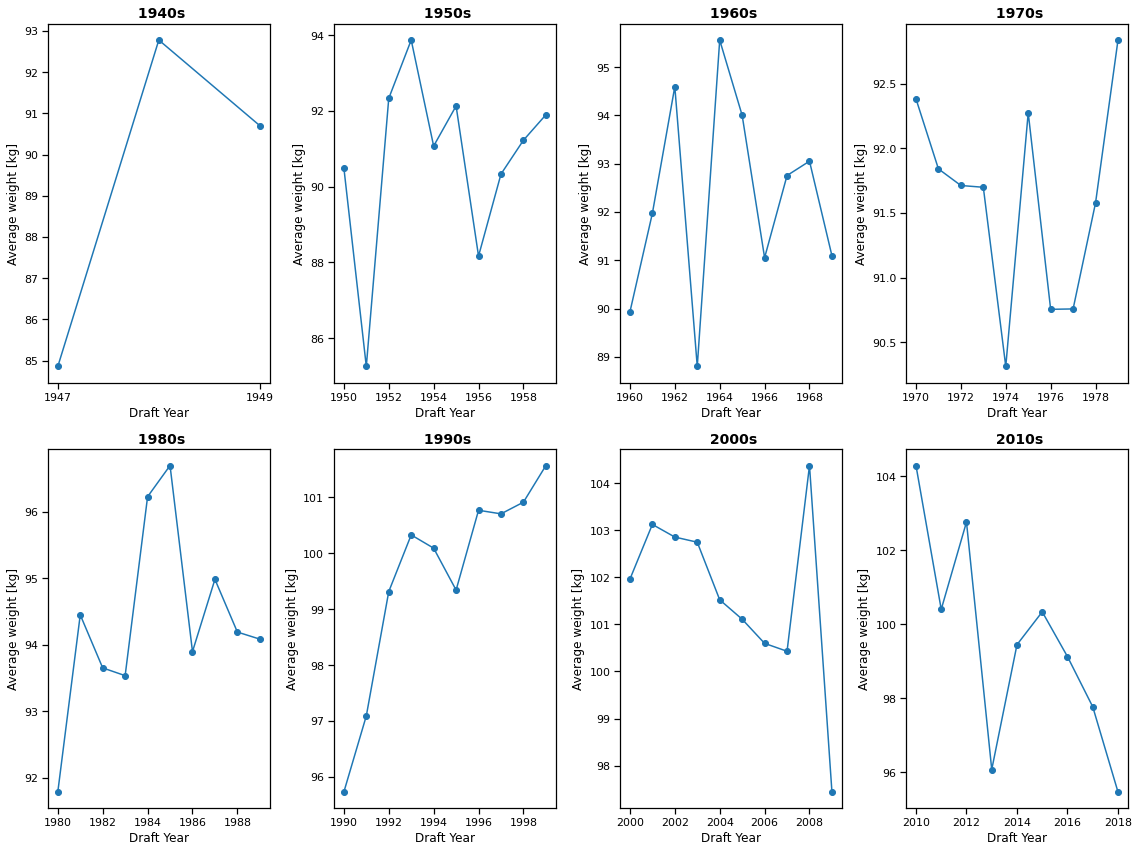

In [1096]:
average_weight_by_decade_year = df.groupby(['decade', 'draft_year'])['weight_kg'].mean().reset_index()

decades = average_weight_by_decade_year['decade'].unique()


num_rows = len(decades) // 4 + (1 if len(decades) % 4 > 0 else 0)
num_cols = min(len(decades), 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 6 * num_rows))

for idx, decade in enumerate(decades):
    row = idx // 4
    col = idx % 4
    data_subset = average_weight_by_decade_year[average_weight_by_decade_year['decade'] == decade]
    ax = axes[row, col]
    ax.plot(data_subset['draft_year'], data_subset['weight_kg'], marker='o')
    ax.set_title(f' {decade}s', fontsize=14, fontweight='bold')
    ax.set_xlabel('Draft Year')
    ax.set_ylabel('Average weight [kg]')
    ax.grid(False)
    draft_years = data_subset['draft_year'].astype(int)
    ax.set_xticks(draft_years[::2])

plt.tight_layout()
plt.show()

<br>

# BMI

In [1097]:
# Calculate BMI
df['BMI'] = (df['weight_kg'] / ((df['height_cm'] / 100) ** 2)).round(2)

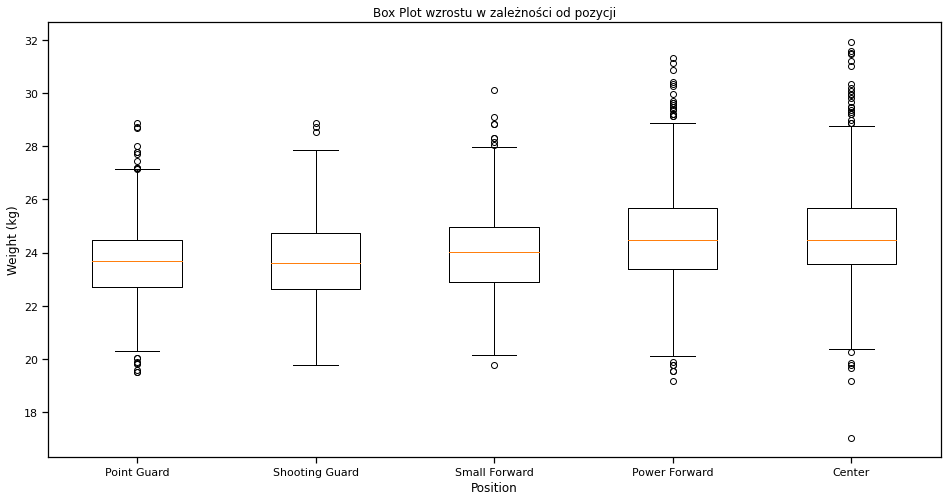

In [1098]:
df_BMI = df[df['BMI'] != 0]

plt.figure(figsize=(16, 8))
plt.boxplot(
    [df_BMI[df_BMI['position'] == 'Point Guard']['BMI'],
     df_BMI[df_BMI['position'] == 'Shooting Guard']['BMI'],
     df_BMI[df_BMI['position'] == 'Small Forward']['BMI'],
     df_BMI[df_BMI['position'] == 'Power Forward']['BMI'],
     df_BMI[df_BMI['position'] == 'Center']['BMI']],
    labels=['Point Guard', 'Shooting Guard', 'Small Forward', 'Power Forward', 'Center']
)
plt.xlabel('Position')
plt.ylabel('Weight (kg)')
plt.title('Box Plot wzrostu w zależności od pozycji')
plt.show()

In [1099]:
df_BMI[['name','BMI']].sort_values(by='BMI',ascending=False)[:5]

,name,BMI
320,Sim Bhullar,31.91
1652,Thomas Hamilton,31.56
3108,Shaquille O'Neal,31.51
3311,Dexter Pittman,31.45
4177,Robert Traylor,31.30


In [1100]:
df_BMI[['name','BMI']].sort_values(by='BMI',ascending=True)[:5]

,name,BMI
380,Manute Bol,17.05
3150,Louis Orr,19.17
3039,Chuck Nevitt,19.19
3799,Kobi Simmons,19.52
3017,Craig Neal,19.52


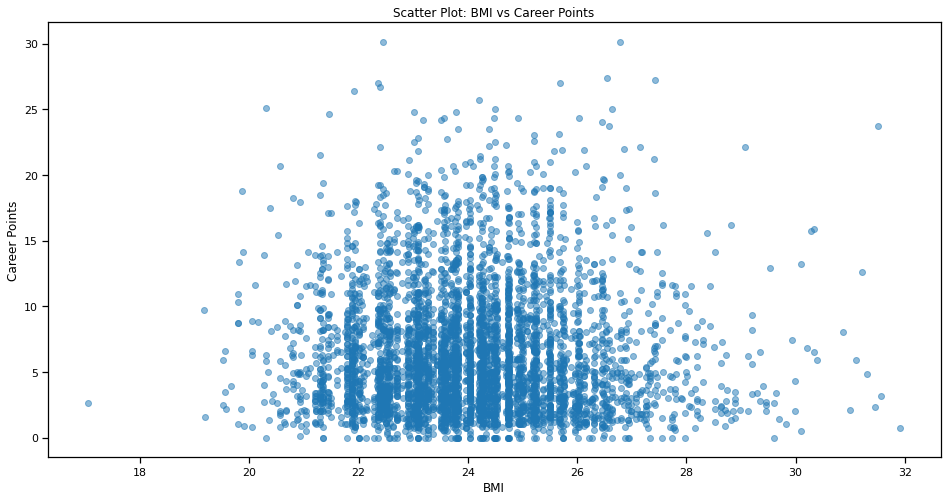

In [1101]:
plt.figure(figsize=(16, 8))
plt.scatter(df_BMI['BMI'], df_BMI['career_PTS'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Career Points')
plt.title('Scatter Plot: BMI vs Career Points')
plt.show()

In [1102]:
df_BMI['BMI'].corr(df_BMI['career_PTS'])

-0.020739040999097975

In [1103]:
df_BMI_f = df_BMI[df_BMI['career_G'] >= 100]

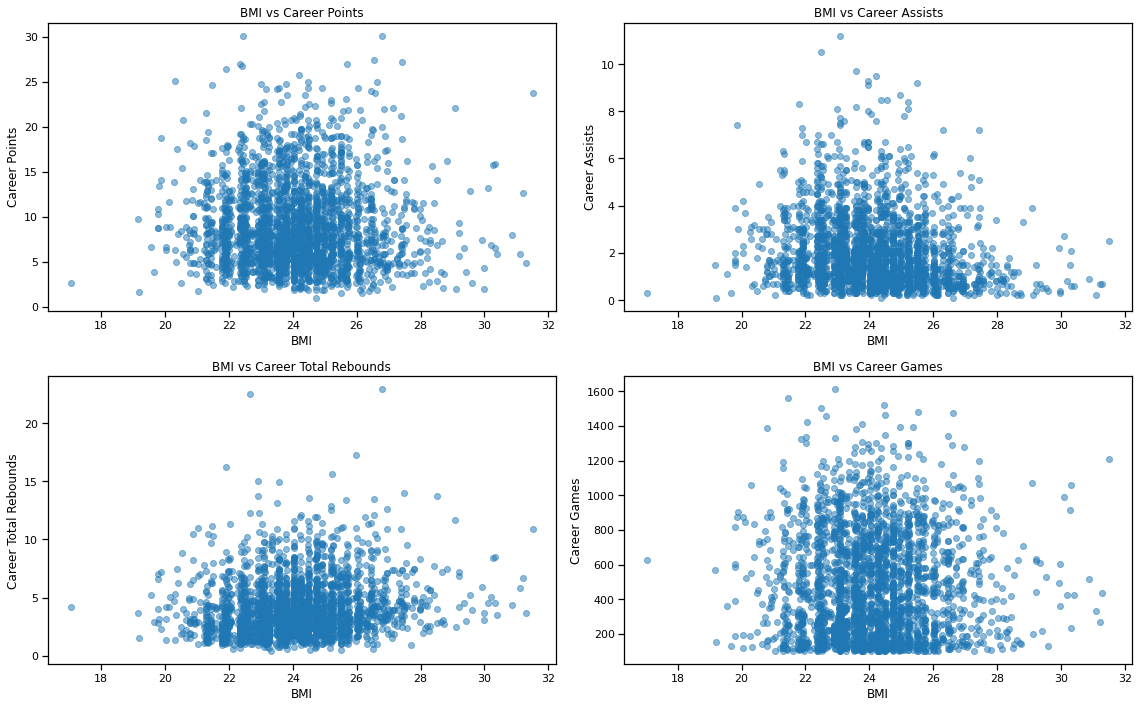

In [1104]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

axes[0, 0].scatter(df_BMI_f['BMI'], df_BMI_f['career_PTS'], alpha=0.5)
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Career Points')
axes[0, 0].set_title('BMI vs Career Points')

axes[0, 1].scatter(df_BMI_f['BMI'], df_BMI_f['career_AST'], alpha=0.5)
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Career Assists')
axes[0, 1].set_title('BMI vs Career Assists')

axes[1, 0].scatter(df_BMI_f['BMI'], df_BMI_f['career_TRB'], alpha=0.5)
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Career Total Rebounds')
axes[1, 0].set_title('BMI vs Career Total Rebounds')

axes[1, 1].scatter(df_BMI_f['BMI'], df_BMI_f['career_G'], alpha=0.5)
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Career Games')
axes[1, 1].set_title('BMI vs Career Games')

plt.tight_layout()
plt.show()


In [1105]:
df_BMI_f['BMI'].corr(df_BMI_f['career_PTS'])

-0.014264716570494931

In [1106]:
df_BMI_f['BMI'].corr(df_BMI_f['career_AST'])

-0.14871811859304468

In [1107]:
df_BMI_f['BMI'].corr(df_BMI_f['career_TRB'])

0.16327917613638024

In [1108]:
df_BMI_f['BMI'].corr(df_BMI_f['career_G'])

0.0031675706741204636

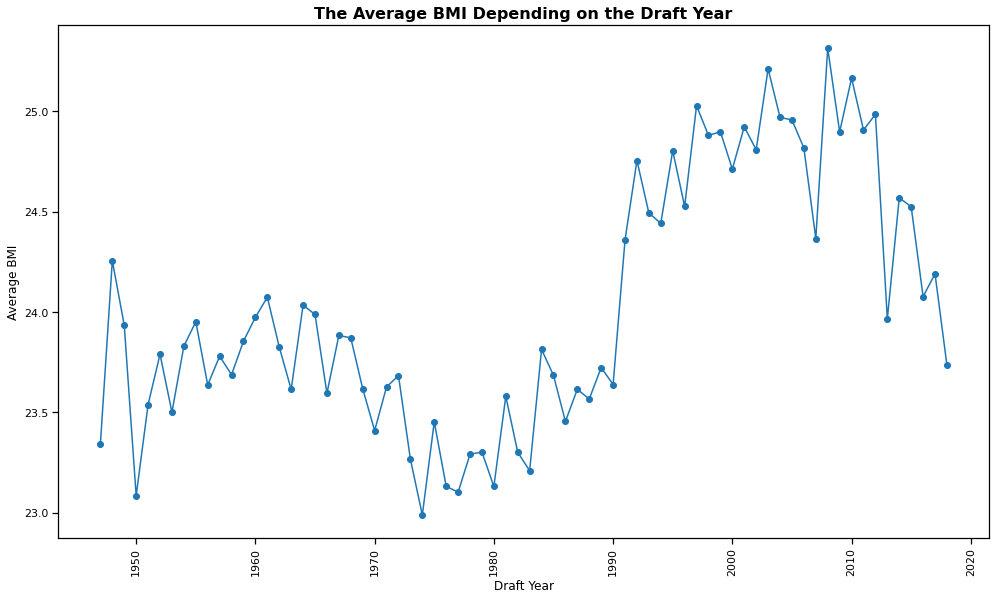

In [1109]:
average_BMI_by_year = df_BMI.groupby('draft_year')['BMI'].mean().reset_index()

plt.figure(figsize=(14, 8.5))
plt.plot(average_BMI_by_year['draft_year'], average_BMI_by_year['BMI'], marker='o')
plt.title('The Average BMI Depending on the Draft Year', fontsize=16, fontweight='bold')
plt.xlabel('Draft Year')
plt.ylabel('Average BMI')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()